In [1]:
# Libraries and utilities

# RENINDER: FARE FIT.TRANSFORM SOLO SU TRAINING E DOPO SUL TEST SOLO .TRANSFORM
# REMINDER: NORMALIZZARE PRIMA DI FARE TUTTO IL PREPROCESSING 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter
from sklearn.decomposition import PCA



In [2]:
df_train=pd.read_csv("./Dataset/RavdessAudioOnlyFeatures_TRAIN.csv")
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [3]:
df_test=pd.read_csv("./Dataset/RavdessAudioOnlyFeatures_TEST.csv")
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


In [4]:
print(f"df_train shape = {df_train.shape}\ndf_test shape = {df_test.shape}")

df_train shape = (1828, 434)
df_test shape = (624, 434)


<AxesSubplot:xlabel='emotion', ylabel='count'>

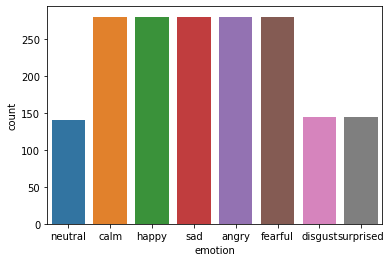

In [5]:
sns.countplot(x ='emotion', data = df_train)

In [6]:
df_train["emotion"].value_counts()

calm         280
happy        280
sad          280
angry        280
fearful      280
disgust      144
surprised    144
neutral      140
Name: emotion, dtype: int64

1HotEncoding + Normalization with RobustScaler()

In [7]:
df_train_copy=df_train
print("These columns are categorical")
c=df_train_copy.select_dtypes(include=['object']).columns.tolist()
c

These columns are categorical


['modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'filename']

In [8]:
le=preprocessing.LabelEncoder()
for i in c:
    df_train_copy[i]=le.fit_transform(df_train_copy[i])
df_train_copy.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0,1,5,0,1,0,1,1,0,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,0,1,5,0,1,1,1,1,18,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,0,1,5,0,0,0,1,1,36,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,0,1,5,0,0,1,1,1,54,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,0,1,1,0,1,0,1,1,72,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [9]:
# Normalizzazione delle variabili numeriche pure

df_normalized = df_train_copy.copy()

numeric_features = [n for n in df_normalized.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]

scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_normalized[numeric_features])
df_normalized[numeric_features] = scaled_features

In [10]:
df_normalized.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0.0,1,5,0,1,0,1,1,0,-0.703721,...,0.0,-0.402429,1.421380,0.948188,0.831973,0.536448,0.0,0.0,10.826275,-2.710136
1,0.0,1,5,0,1,1,1,1,18,-0.666674,...,0.0,1.702463,1.092210,0.597843,0.441189,0.253557,0.0,0.0,0.064887,0.425032
2,0.0,1,5,0,0,0,1,1,36,-0.740767,...,0.0,-0.402429,0.899688,0.680414,0.652634,0.569396,0.0,0.0,3.519767,-1.290314
3,0.0,1,5,0,0,1,1,1,54,-0.851860,...,0.0,1.346476,0.835496,0.532143,0.515441,0.405521,0.0,0.0,0.218601,-0.015380
4,0.0,1,1,0,1,0,1,1,72,-0.444465,...,0.0,1.018057,0.935801,0.644804,0.549313,0.296205,0.0,0.0,1.260594,-0.448574


In [11]:
#Normalization of the df_test

df_test_copy=df_test
print("These columns are categorical")
c=df_test_copy.select_dtypes(include=['object']).columns.tolist()

le=preprocessing.LabelEncoder()
for i in c:
    df_test_copy[i]=le.fit_transform(df_test_copy[i])

# Normalizzazione delle variabili numeriche pure

df_test_normalized = df_test_copy.copy()
numeric_features = [n for n in df_test_normalized.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_test_normalized[numeric_features])
df_test_normalized[numeric_features] = scaled_features

df_test_normalized

These columns are categorical


,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,0.0,1,5,0,1,0,19,1,0,-0.799992,...,0.0,1.846860,1.438353,0.923724,1.163427,1.195101,0.0,0.0,0.932578,-0.373546
1,0.0,1,5,0,1,1,19,1,6,-0.933337,...,0.0,0.860672,0.625835,0.496705,0.589635,0.421714,0.0,0.0,0.613070,-0.426190
2,0.0,1,5,0,0,0,19,1,12,-0.833333,...,0.0,-0.209609,0.739130,0.594399,0.676856,0.852183,0.0,0.0,2.613672,-1.180915
3,0.0,1,5,0,0,1,19,1,18,-0.866675,...,0.0,2.292273,1.301058,0.799169,1.033418,1.126866,0.0,0.0,-0.137750,0.092519
4,0.0,1,1,0,1,0,19,1,24,-0.500000,...,0.0,1.789930,1.120652,0.814457,0.998068,1.171144,0.0,0.0,0.408864,-0.324605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.0,0,3,0,0,1,24,0,599,0.399996,...,0.0,-0.356398,-0.525285,0.134029,0.030574,-0.190061,0.0,0.0,0.486514,-0.831059
620,0.0,0,3,1,1,0,24,0,605,0.366654,...,0.0,-0.350657,-0.544253,-0.571400,-1.343427,-1.688882,0.0,0.0,-0.237622,0.681947
621,0.0,0,3,1,1,1,24,0,611,0.133325,...,0.0,-0.344234,-0.518927,-0.844303,-1.622815,-2.158046,0.0,0.0,-0.464793,1.062827
622,0.0,0,3,1,0,0,24,0,617,0.066683,...,0.0,-0.234289,-0.298783,-0.223406,-0.614824,-0.867540,0.0,0.0,0.155275,0.241435


In [12]:
col=[x for x in df_normalized.columns if x!="emotion"]
X=df_normalized[col].values
y = np.array(df_normalized["emotion"])

#holdout
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [13]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2, 3, 4, 5, 6, 7]),
  array([196, 196, 101, 196, 196,  98, 196, 100], dtype=int64)),
 (array([0, 1, 2, 3, 4, 5, 6, 7]),
  array([84, 84, 43, 84, 84, 42, 84, 44], dtype=int64)))

Learner utilizzati: KNN, DT

In [14]:
learner_KNN = KNeighborsClassifier(n_neighbors= 14, metric= 'euclidean', weights= 'distance')
learner_DT= DecisionTreeClassifier(max_depth=20,min_samples_leaf=15,min_samples_split=2)

TODO: creare nuovo notebook dove fare gridsearch per DT,KNN dopodichè provare i diversi metodi di undersampling e reduction e poi provare classificazione su di questi.

# Esperimento 1: Undersampling + Dim.Reduction + New classification with tuned hyperpamaters

Random Undersampling

In [15]:
# Random Undersampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 98, 1: 98, 2: 98, 3: 98, 4: 98, 5: 98, 6: 98, 7: 98})


In [16]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        84
           1       0.97      0.86      0.91        84
           2       1.00      0.98      0.99        43
           3       1.00      0.98      0.99        84
           4       0.94      0.95      0.95        84
           5       0.86      1.00      0.92        42
           6       0.94      0.95      0.95        84
           7       0.98      1.00      0.99        44

    accuracy                           0.95       549
   macro avg       0.95      0.96      0.96       549
weighted avg       0.95      0.95      0.95       549



In [17]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = rus.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.27      0.50      0.35        48
           6       0.17      0.27      0.21        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.16      0.13       624



In [18]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       1.00      0.95      0.98        84
           2       1.00      1.00      1.00        43
           3       0.98      1.00      0.99        84
           4       1.00      1.00      1.00        84
           5       0.91      0.98      0.94        42
           6       1.00      0.96      0.98        84
           7       0.98      1.00      0.99        44

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549



In [19]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = rus.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.33      0.50      0.40        48
           6       0.17      0.25      0.20        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.15      0.13       624



Condensed nearest neighbour

In [20]:
import warnings
warnings.simplefilter("ignore")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({5: 98, 1: 20, 7: 6, 4: 4, 3: 3, 0: 2, 6: 2, 2: 1})


In [21]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60        84
           1       0.25      0.79      0.38        84
           2       1.00      0.21      0.35        43
           3       0.98      0.49      0.65        84
           4       1.00      0.07      0.13        84
           5       0.29      1.00      0.45        42
           6       1.00      0.26      0.42        84
           7       0.05      0.02      0.03        44

    accuracy                           0.41       549
   macro avg       0.69      0.41      0.38       549
weighted avg       0.74      0.41      0.40       549



In [22]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cnn.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.06      0.03      0.04        96
           1       0.09      0.34      0.15        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.14      0.50      0.22        48
           6       0.02      0.01      0.01        96
           7       0.00      0.00      0.00        48

    accuracy                           0.10       624
   macro avg       0.04      0.11      0.05       624
weighted avg       0.04      0.10      0.05       624



In [23]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.21      0.51      0.30        84
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        84
           4       0.00      0.00      0.00        84
           5       0.12      1.00      0.22        42
           6       0.00      0.00      0.00        84
           7       0.00      0.00      0.00        44

    accuracy                           0.15       549
   macro avg       0.04      0.19      0.06       549
weighted avg       0.04      0.15      0.06       549



In [24]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cnn.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.08      1.00      0.14        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.08       624
   macro avg       0.01      0.12      0.02       624
weighted avg       0.01      0.08      0.01       624



Tomek Links

In [25]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({3: 196, 0: 194, 4: 194, 6: 194, 1: 193, 2: 101, 7: 100, 5: 98})


In [26]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        84
           1       1.00      0.95      0.98        84
           2       1.00      0.98      0.99        43
           3       0.99      0.99      0.99        84
           4       0.98      0.96      0.97        84
           5       0.95      0.98      0.96        42
           6       0.94      0.96      0.95        84
           7       0.96      1.00      0.98        44

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



In [27]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = tl.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        96
           1       0.02      0.03      0.03        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.31      0.50      0.38        48
           6       0.19      0.29      0.23        96
           7       0.00      0.00      0.00        48

    accuracy                           0.17       624
   macro avg       0.12      0.17      0.14       624
weighted avg       0.12      0.17      0.14       624



In [28]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       1.00      0.98      0.99        84
           2       1.00      1.00      1.00        43
           3       0.99      0.99      0.99        84
           4       1.00      1.00      1.00        84
           5       0.95      1.00      0.98        42
           6       1.00      0.99      0.99        84
           7       1.00      1.00      1.00        44

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [29]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = tl.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.33      0.50      0.40        48
           6       0.17      0.25      0.20        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.15      0.13       624



Edited Nearest Neighbour

In [30]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({3: 184, 6: 177, 0: 174, 4: 173, 1: 172, 5: 98, 2: 95, 7: 95})


In [31]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        84
           1       0.99      0.89      0.94        84
           2       1.00      0.98      0.99        43
           3       0.98      0.99      0.98        84
           4       0.96      0.94      0.95        84
           5       0.87      0.98      0.92        42
           6       0.92      0.94      0.93        84
           7       0.96      1.00      0.98        44

    accuracy                           0.95       549
   macro avg       0.95      0.96      0.95       549
weighted avg       0.95      0.95      0.95       549



In [32]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = enn.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        96
           1       0.01      0.01      0.01        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.28      0.50      0.36        48
           6       0.17      0.26      0.20        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.16      0.13       624



In [33]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        84
           1       0.99      0.94      0.96        84
           2       1.00      1.00      1.00        43
           3       0.98      0.99      0.98        84
           4       1.00      0.98      0.99        84
           5       0.89      1.00      0.94        42
           6       0.99      0.99      0.99        84
           7       1.00      1.00      1.00        44

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549



In [34]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = enn.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.33      0.50      0.40        48
           6       0.16      0.24      0.19        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.11      0.15      0.13       624
weighted avg       0.11      0.15      0.13       624



Cluster Centroids

In [35]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42 # minibatch version is faster than Kmeans
)
X_res, y_res = cc.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 140, 1: 140, 2: 140, 3: 140, 4: 140, 5: 140, 6: 140, 7: 140})


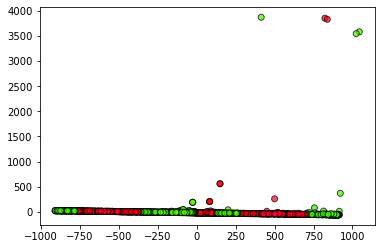

In [36]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [37]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.95      0.92      0.93        84
           2       1.00      1.00      1.00        43
           3       0.98      1.00      0.99        84
           4       1.00      0.94      0.97        84
           5       0.86      1.00      0.92        42
           6       0.99      1.00      0.99        84
           7       1.00      1.00      1.00        44

    accuracy                           0.97       549
   macro avg       0.97      0.98      0.97       549
weighted avg       0.98      0.97      0.97       549



In [38]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.42      0.50      0.46        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.27      0.50      0.35        48
           6       0.21      0.31      0.25        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.12      0.16      0.14       624



In [39]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       1.00      0.96      0.98        84
           2       1.00      1.00      1.00        43
           3       1.00      0.99      0.99        84
           4       1.00      1.00      1.00        84
           5       0.93      1.00      0.97        42
           6       1.00      1.00      1.00        84
           7       1.00      1.00      1.00        44

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [40]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.32      0.50      0.39        48
           6       0.18      0.27      0.21        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.16      0.13       624



# Esperimento 2: Oversampling + Dim.Reduction + New classification with tuned hyperparameters

Random Oversampler

In [41]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 196, 3: 196, 1: 196, 4: 196, 6: 196, 5: 196, 2: 196, 7: 196})


In [42]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.99      0.92      0.95        84
           2       1.00      0.98      0.99        43
           3       0.99      0.99      0.99        84
           4       0.98      0.95      0.96        84
           5       0.89      1.00      0.94        42
           6       0.95      0.96      0.96        84
           7       0.98      1.00      0.99        44

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



In [43]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.42      0.50      0.46        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.27      0.50      0.35        48
           6       0.21      0.31      0.25        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.12      0.16      0.14       624



In [44]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       1.00      0.98      0.99        84
           2       1.00      1.00      1.00        43
           3       0.99      0.99      0.99        84
           4       1.00      1.00      1.00        84
           5       0.95      0.98      0.96        42
           6       1.00      0.99      0.99        84
           7       0.98      1.00      0.99        44

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [45]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.32      0.50      0.39        48
           6       0.18      0.27      0.21        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.16      0.13       624



Smote

In [46]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 196, 3: 196, 1: 196, 4: 196, 6: 196, 5: 196, 2: 196, 7: 196})


In [47]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.99      0.89      0.94        84
           2       1.00      0.98      0.99        43
           3       0.99      0.99      0.99        84
           4       0.98      0.95      0.96        84
           5       0.86      1.00      0.92        42
           6       0.95      0.96      0.96        84
           7       0.98      1.00      0.99        44

    accuracy                           0.96       549
   macro avg       0.96      0.97      0.96       549
weighted avg       0.97      0.96      0.96       549



In [48]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.42      0.50      0.46        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.27      0.50      0.35        48
           6       0.21      0.31      0.25        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.12      0.16      0.14       624



In [49]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       1.00      0.98      0.99        84
           2       1.00      1.00      1.00        43
           3       0.99      0.99      0.99        84
           4       1.00      1.00      1.00        84
           5       0.95      1.00      0.98        42
           6       1.00      0.99      0.99        84
           7       1.00      1.00      1.00        44

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [50]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.32      0.50      0.39        48
           6       0.18      0.27      0.21        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.16      0.13       624



Adasyn

In [53]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 200, 5: 199, 0: 196, 3: 196, 1: 196, 4: 196, 6: 196, 7: 196})


In [54]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.99      0.83      0.90        84
           2       0.93      0.98      0.95        43
           3       0.99      0.96      0.98        84
           4       0.98      0.95      0.96        84
           5       0.78      1.00      0.88        42
           6       0.95      0.96      0.96        84
           7       0.98      0.98      0.98        44

    accuracy                           0.95       549
   macro avg       0.94      0.96      0.95       549
weighted avg       0.95      0.95      0.95       549



In [55]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_KNN.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.42      0.50      0.46        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.27      0.50      0.35        48
           6       0.21      0.31      0.25        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.12      0.16      0.14       624



In [56]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       1.00      0.98      0.99        84
           2       1.00      1.00      1.00        43
           3       0.99      0.99      0.99        84
           4       1.00      1.00      1.00        84
           5       0.95      0.98      0.96        42
           6       1.00      0.99      0.99        84
           7       0.98      1.00      0.99        44

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [57]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
X_res_test, y_res_test = cc.fit_resample(X, y)

col=[x for x in df_test_normalized.columns if x!="emotion"]
X_new=df_test_normalized[col].values
y_new = np.array(df_test_normalized["emotion"])
classifier = learner_DT.fit(X_res_test, y_res_test)
predictions = classifier.predict(X_new)
print(classification_report(y_new,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        96
           5       0.32      0.50      0.39        48
           6       0.18      0.27      0.21        96
           7       0.00      0.00      0.00        48

    accuracy                           0.16       624
   macro avg       0.11      0.16      0.13       624
weighted avg       0.11      0.16      0.13       624



# Dimensionality Reduction

In [58]:
from sklearn.feature_selection import VarianceThreshold

In [63]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)
print(f"Train new shape: {X_train_sel.shape}\nTrain original shape: {X_train.shape}")

Train new shape: (1279, 368)
Train original shape: (1279, 433)


In [64]:
X_test_sel = sel.transform(X_test)
classifier = learner_KNN.fit(X_train_sel, y_train)
predictions = classifier.predict(X_test_sel)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.99      0.95      0.97        84
           2       1.00      0.98      0.99        43
           3       0.99      0.99      0.99        84
           4       0.98      0.95      0.96        84
           5       0.95      0.98      0.96        42
           6       0.95      0.96      0.96        84
           7       0.96      1.00      0.98        44

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



In [67]:
# Now train classifier with the entire train_dataset and test it on the test_dataset
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_sel = sel.fit_transform(X)
print(f"Train new shape: {X_train_sel.shape}\nTrain original shape: {X_train.shape}")

Train new shape: (1279, 368)
Train original shape: (1279, 433)
